### A demonstration of the use of machine learning to teach a computer the Celsius to Fahrenheit conversion formula

Import appropriate libraries:

In [0]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'1.13.1'

Our dataset is a pair of small numpy arrays. The training data is in the celcius array, and the training labels are in the fahrenheit array.

In [0]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

The flow is:


1.   Build the model
2.   Compile it with appropriate optimizer, loss and/or metrics
3.   Train the model



Build:

We want to use just one node in one layer for this small experiment. We're attempting to follow the format for the equation of a line: **y = mx + c**, since our Celsius to Fahrenheit conversion formula follows that equation: **F = 1.8C + 32**

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

Instructions for updating:
Colocations handled automatically by placer.


Compile:

Compile the model using the Adam optimizer and a learning rate of 0.1. Also, we'll measure loss using mean squared error.

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
             loss=tf.keras.losses.mean_squared_error)

Train:

Training happens using the fit() method. We feed in the data and labels and train for 500 epochs, since we have limited data. One epoch represents a full pass throught the dataset.

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

Instructions for updating:
Use tf.cast instead.


After fitting, we can plot the loss history to see how our model learnt and reduced loss over time.

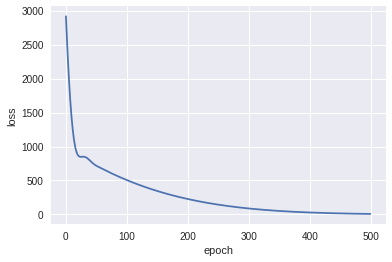

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

We can now attempt to predict the Fahrenheit value of 100 degrees Celsius using our model. We need to pass the input in as an array based on our model structure.

In [8]:
model.predict([100])

array([[211.32317]], dtype=float32)

The correct answer is 212. Our model comes close with 211.32317. You need to realize that our model has **no idea** what the formula is. It simply looked at the examples again and again until it learnt its own rules.

We can look at what rules it learnt, by observing the weights and biases it assigned to our single node:

In [9]:
model.get_layer(index=0).get_weights()

[array([[1.8226193]], dtype=float32), array([29.061235], dtype=float32)]

We observe two values: **1.82** and **29.06**. This figures may change on a rerun.

Although not perfect, this is close to 1.8 and 32, the constants in our conversion formula. Not too shabby for a very basic network.

#### The kicker is, the model we just built is not very practical for a real-world use case.
In real life, you probably would not know that your model was trying to learn the conversin formula. You would most likely not build a model with a single node. 

You're more likely to build a multi-layer, multi-node model. Of course, the weights would make less sense to you, but ML is typically for solving problems you can't easilywrap your mind around.

Let's look at a model with the arbitrary node structure: **4 (input) -> 4 (hidden) -> 1 (output)**

Build:

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=[1]),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1),
])

Compile:

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")

Instructions for updating:
Use tf.cast instead.


Train:

In [0]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

Now let's plot our loss graph and see what happened.

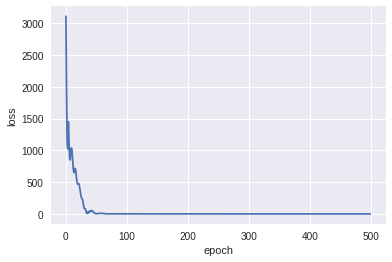

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

Although less smooth, our new model optimized our loss a lot quicker than our initial model.

In [14]:
model.predict([100])

array([[211.74742]], dtype=float32)

A prediction of the Fahrenheit value of 100 degrees Celcius gives us ~211.75. A little better than our initial model.

We have successfully taught a neural network to convert from Celsius to Fahrenheit with very little data.